<a href="https://colab.research.google.com/github/rmfpafls/Udemy_lecture/blob/main/deep_learning/3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. RNN

In [ ]:
import torch
import numpy as np

input_size = 4
hidden_size = 2

h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

input_data_np = np.array([[h, e, l, l, o],
                          [e, o, l,l,l],
                          [l, l, e, e, l]], dtype = np.float32)

# transform as torch tensor
input_data = torch.Tensor(input_data_np)

rnn = torch.nn.RNN(input_size, hidden_size)
outputs, _status = rnn(input_data)

"""
output
: (sequence_length, batch_size, hidden_size) 형태의 텐서로 나오고
: 입력 시퀀스의 각 타임스텝에서 나오는 출력을 포함한다.
: 각 입력에 대해 RNN이 출력하는 결과
_status (1, batch_size, hidden_size) 형태의 텐서
: 최종 타임스텝에서의 히든 상태
"""

'\noutput\n: (sequence_length, batch_size, hidden_size) 형태의 텐서로 나오고\n: 입력 시퀀스의 각 타임스텝에서 나오는 출력을 포함한다.\n: 각 입력에 대해 RNN이 출력하는 결과\n_status (1, batch_size, hidden_size) 형태의 텐서\n: 최종 타임스텝에서의 히든 상태 \n'

In [ ]:
print(outputs)

tensor([[[ 0.2707, -0.5556],
         [-0.5425, -0.7704],
         [ 0.2042, -0.0196],
         [ 0.2042, -0.0196],
         [-0.4594, -0.3596]],

        [[-0.6793, -0.8105],
         [-0.8802, -0.4699],
         [ 0.3107, -0.0265],
         [ 0.3107, -0.0265],
         [-0.3210, -0.0784]],

        [[-0.6566, -0.1570],
         [-0.5874, -0.0918],
         [-0.4068, -0.7744],
         [-0.4068, -0.7744],
         [-0.0489, -0.0288]]], grad_fn=<StackBackward0>)


In [ ]:
print(_status)

tensor([[[-0.6566, -0.1570],
         [-0.5874, -0.0918],
         [-0.4068, -0.7744],
         [-0.4068, -0.7744],
         [-0.0489, -0.0288]]], grad_fn=<StackBackward0>)


----

# 2. hihello 문제

In [ ]:
# list of available characters
char_set = ['h', 'i', 'e', 'l', 'o']

#hyper parameters
input_size = len(char_set)
hidden_size = len(char_set)
learning_rate = 0.1

# data setting
x_data = [[0, 1, 0, 2, 3, 3]] # hihello 원핫인코딩의 인덱스 값
x_one_hot = [[[1, 0, 0, 0, 0], # hihello의 원핫인코딩임
              [0, 1, 0, 0, 0],
              [1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 1, 0]]]
y_data = [[1, 0, 2, 3, 3, 4]] # 예측할 대상 ihello

# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)


In [ ]:
# code run through(charseq)

sample = "if you want you"
# make dictionary
char_set = list(set(sample)) # set : python의 중복된 값들을 제거.
print(char_set) # ['t', 'w', 'n', 'y', 'o', 'i', 'u', 'a', ' ', 'f']

char_dic = {c: i for i, c in enumerate(char_set)}
# 특정 character를 주면 그 index를 알아서 찾아주는 char_dic
print(char_dic) # {'t': 0, 'w': 1, 'n': 2, 'y': 3, 'o': 4, 'i': 5, 'u': 6, 'a': 7, ' ': 8, 'f': 9}

# hyper parameters
dic_size = len(char_dic) # 중복을 제외한 글자들의 수
hidden_size = dic_size
learning_rate = 0.1

# data setting
sample_idx = [char_dic[c] for c in sample]
# sample의 글자에 해당하는 idx

x_data = [sample_idx[:-1]] # 얘는 처음부터 끝까지
x_one_hot = [np.eye(dic_size)[x] for x in x_data] # 전체 사이즈 중에 x에 해당하는 값만 1
y_data = [sample_idx[1:]]

# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

['f', 'a', ' ', 'y', 't', 'o', 'i', 'u', 'n', 'w']
{'f': 0, 'a': 1, ' ': 2, 'y': 3, 't': 4, 'o': 5, 'i': 6, 'u': 7, 'n': 8, 'w': 9}


In [ ]:
# code run through
# declare RNN
import torch.optim as optim

# X : x_one_hot
# y = y_data

rnn = torch.nn.RNN(input_size, hidden_size, batch_first = True)

# loss & optimizer setting
criterion = torch.nn.CrossEntropyLoss()
# Crossentropy loss : 2개의 확률 분포가 주어졌을 때, 그 확률 분포가 얼마나 비슷한지를 나타내는 것.
optimizer = optim.Adam(rnn.parameters(), learning_rate)
# pytorch에서 모델의 파라미터를 업데이트하기위해 Adam 최적화 기법을 사용하는 구문.
# optim.Adam
#: Adaptive Moment Estimation의 약자. 경사 하강법 기반의 최적화 알고리즘.
#: 학습률을 자동으로 조정하며, 두 개의 모멘텀을 이요하여 그라디언트를 안정적으로 업데이트
#: Adam 학습 속도를 가속화하면서도 과도한 진동을 억제하여, 일반적으로 많이 사용됨.

#start training
for i in range(100):
  optimizer.zero_grad() # 초기화를 해줘야 매 plot마다 새로운 graient를 구할 수 있다.
  outputs, _status = rnn(X)
  # _status는 만약에 다음 input이 있으면, 그 다음 input은 RNN의 안에서 계산할 때 쓰이게 될 hidden state
  # : 여기서는 주어진 모든 input을 다 처리하고 나오는 hidden state이기 때문에 따로 쓰이지 않는다.
  loss = criterion(outputs.view(-1,input_size), Y.view(-1))
  # shape를 batch_dimension이 앞에 오도록 시작하게끔 바꿔준 다음에 loss를 계산해주게 된다.
  loss.backward() # backpropagation이 진행되고 gradient 값을 구하게 된다.
  optimizer.step()
  # 이 gradient 값을 토대로 optimizer.step()을 진행하면
  # 아까 optimizer에 넣어뒀던 이 파라미터들에 대해서 업데이트를 하게 된다.


# 모델이 실제로 어떻게 예측했는지에 대해서 알아보려고 하는 코드
  result = outputs.data.numpy().argmax(axis = 2)
  # output을 numpy array로 가져오고 그 다음에 여기서 argmax(axis = 2)를 해주면
  # index = 2인 dimension.
  # 즉, 어떤 character인지 나타내는 dimension에서 어떤 character가 가장 가능성 있는지에 대한
  # 숫자를 가지고 있는데 이 중 가장 큰 숫자가 있는 index를 가져오는 함수가 argmax()임.
  result_str = ''.join([char_set[c] for c in np.squeeze(result)])
  # np.squeeze(result) : shape에서 dimension이 1인 축을 없애주는 함수

  print(i, "loss : ", loss.item(), "prediction : ", result, "true Y : ", y_data, "predicion str:", result_str)

0 loss :  1.7369784116744995 prediction :  [[3 1 4 1 4 0]] true Y :  [[1, 0, 2, 3, 3, 4]] predicion str: lioioh
1 loss :  1.5403571128845215 prediction :  [[3 0 3 2 4 3]] true Y :  [[1, 0, 2, 3, 3, 4]] predicion str: lhleol
2 loss :  1.4041223526000977 prediction :  [[3 0 3 3 3 3]] true Y :  [[1, 0, 2, 3, 3, 4]] predicion str: lhllll
3 loss :  1.2789825201034546 prediction :  [[3 0 2 3 3 3]] true Y :  [[1, 0, 2, 3, 3, 4]] predicion str: lhelll
4 loss :  1.1425503492355347 prediction :  [[3 0 2 3 3 3]] true Y :  [[1, 0, 2, 3, 3, 4]] predicion str: lhelll
5 loss :  1.0180224180221558 prediction :  [[3 0 2 3 0 4]] true Y :  [[1, 0, 2, 3, 3, 4]] predicion str: lhelho
6 loss :  0.9327946305274963 prediction :  [[3 0 2 3 0 4]] true Y :  [[1, 0, 2, 3, 3, 4]] predicion str: lhelho
7 loss :  0.8611664772033691 prediction :  [[1 0 2 3 0 4]] true Y :  [[1, 0, 2, 3, 3, 4]] predicion str: ihelho
8 loss :  0.7920508980751038 prediction :  [[1 0 2 3 0 4]] true Y :  [[1, 0, 2, 3, 3, 4]] predicion str:

# 3. longseq



In [ ]:
# 1. Making sequence dataset from long sentence
sentence = ("if you want to build a ship, don't drum up people together to collect wood and don't assign them tasks and work, but rather teach them to long for the endless immensity of the sea.")

# data setting
x_data = []
y_data = []

sequence_length = 10

for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i:i + sequence_length]
  y_str = sentence[i+1:i + sequence_length + 1]

  print(i, x_str, '->', y_str)

  x_data.append([char_dic[c] for c in x_str])
  y_data.append([char_dic[c] for c in y_str])

x_one_hot = [np.eye(dic_size)[x] for x in x_data]

# transform as torch tensor variable
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)

# declare RNN + FC
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first = True)
    self.fc = torch.nn.Linear(hidden_dim, hidden_dim, bias = True)

  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x)
    return x

net = Net(dic_size, hidden_size, 2)

criterion = torch.nn.CrossEntropyLoss()
optimizer = opim.Adam(net.parameters(), learning_rate)

# start training
for i in range(100):
  optimizer.zero_grad()
  outputs = net(x)
  loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
  loss.backward()
  optimizer.step()

  results = outputs.argmax(dim = 2 )
  predict_str = ""

  for j, result in enumerate(results):
    print(i, j, ''.join([char_set[t] for t in result]), loss_item())
    if j == 0:
      predict_str += ''.join([char_set[t] for t in result])
    else:
      predict_str += char_set[result[-1]]

0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b


KeyError: 'b'

# 4. 시계열 데이터 RNN

In [ ]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Random seed to make results deterministic and reproducible

torch.manual_seed(0)
# 코드가 실행될 때마다 같은 값이 생성되도록 보장해 주기 때문에, 결과의 일관성을 유지할 수 있습니다.

def minmax_scaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator + 1e-7)

# trainX, trainY = build_dataset(train_set, seq_length)
# testX, testY = build_dataset(test_set, seq_length)

def build_dataset(time_series, seq_length):
  # 우리가 원하는 형태로 label과 학습에 대상이 되는 값들을 나눠주는 특성
  dataX = []
  dataY = []
  for i in range(0, len(time_series)- seq_length):
    _x = time_series[i: i+seq_length, :]
    _y = time_series[i+seq_length, [-1]]
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)
  return np.array(dataX), np.array(dataY)

# LSTM 모델 정의
# net = Net(data_dim, hidden_dim, output_dim, 1)에서 부름
class Net(torch.nn.Module): # nn선언
  def __init__(self, input_dim, hidden_dim, output_dim, layers):
    super(Net,self).__init__()
    self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers = layers, batch_first = True)
    self.fc = torch.nn.Linear(hidden_dim, output_dim, bias = True)

  def forward(self, x):
    x, _status = self.rnn(x)
    x = self.fc(x[:,-1])
    return x


seq_length = 6
data_dim = 5 # 시가, 최고가, 최저가, 거래량, 종량
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500


xy = np.loadtxt("/content/drive/MyDrive/boostcourse_딥러닝/google.dataset.csv", delimiter = ",")
print(xy)
xy = xy[::-1]
 # 불러온 data를 시간순의 역순으로

train_size = int(len(xy) * 0.7)
# 한번 ordering해주는 작업을 거친 후에 70%만 남기고, 70%는 학습 set에서 사용
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# minmax_scaler : 최대_최소 정규화
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)
# 스케일링을 하는 이유 : 숫자가 크면 계산하는데 부담이니까 0부터 1사이 값으로 바꿔준다

# dataset 구축
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# 데이커를 pytorch tensor로 변환(3D 형태)
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

print("trainX_tensor.shape:", trainX_tensor.shape)  # (batch_size, seq_length, input_dim)
print("trainY_tensor.shape:", trainY_tensor.shape)  # (batch_size, 1)
print("testX_tensor.shape:", testX_tensor.shape)    # (batch_size, seq_length, input_dim)
print("testY_tensor.shape:", testY_tensor.shape)


net = Net(data_dim, hidden_dim, output_dim, 1)

criterion = torch.nn.MSELoss() # loss를 재고
optimizer = optim.Adam(net.parameters(), lr = learning_rate) # Adam optimizer를 통해서 최적화 할거다

## Training & Evaluation
for i in range(iterations):
  optimizer.zero_grad()
  outputs = net(trainX_tensor)
  loss = criterion(outputs, trainY_tensor)
  loss.backward()
  optimizer.step()
  print(i,loss.item())

plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()

[[8.28659973e+02 8.33450012e+02 8.28349976e+02 1.24770000e+06
  8.31659973e+02]
 [8.23020020e+02 8.28070007e+02 8.21655029e+02 1.59780000e+06
  8.28070007e+02]
 [8.19929993e+02 8.24400024e+02 8.18979980e+02 1.28170000e+06
  8.24159973e+02]
 [8.19359985e+02 8.23000000e+02 8.18469971e+02 1.30400000e+06
  8.18979980e+02]
 [8.19000000e+02 8.23000000e+02 8.16000000e+02 1.05360000e+06
  8.20450012e+02]
 [8.16000000e+02 8.20958984e+02 8.15489990e+02 1.19810000e+06
  8.19239990e+02]
 [8.11700012e+02 8.15250000e+02 8.09780029e+02 1.12910000e+06
  8.13669983e+02]
 [8.09510010e+02 8.10659973e+02 8.04539978e+02 9.89700000e+05
  8.09559998e+02]
 [8.07000000e+02 8.11840270e+02 8.03190002e+02 1.15530000e+06
  8.08380005e+02]]
trainX_tensor.shape: torch.Size([0])
trainY_tensor.shape: torch.Size([0])
testX_tensor.shape: torch.Size([0])
testY_tensor.shape: torch.Size([0])


ValueError: LSTM: Expected input to be 2D or 3D, got 1D instead

위 코드가 오류나는 이유는 data차원이 5차원인데 6개로 나눠서 계산하려고 했기때문. 수정하니 출력이 나오긴함.
근데 예측을 전혀 못함;;

seq_length를 1,2,3,4,5로 바꿔봤는데 2가 가장 비슷하게 나왔음

[[0.         0.09564785 0.         0.52688514 0.        ]
 [0.20307549 0.         0.08834939 0.         0.09776241]] -> [0.43827464]
[[0.20307549 0.         0.08834939 0.         0.09776241]
 [0.38026033 0.37196247 0.43128536 0.44352529 0.43827464]] -> [0.89974968]
[[0.38026033 0.37196247 0.43128536 0.44352529 0.43827464]
 [0.72815622 0.83460198 0.80497466 0.66306077 0.89974968]] -> [0.99999999]
[[0.72815622 0.83460198 0.80497466 0.66306077 0.89974968]
 [0.97087496 0.99999999 0.83835235 0.20330894 0.99999999]] -> [0.87820785]
[[0.         0.         0.         0.         0.11593319]
 [0.03726563 0.         0.19999804 0.46012495 0.        ]] -> [0.40851702]
[[0.03726563 0.         0.19999804 0.46012495 0.        ]
 [0.09627284 0.13397343 0.24129439 0.41914737 0.40851702]] -> [0.71687949]
[[0.09627284 0.13397343 0.24129439 0.41914737 0.40851702]
 [0.4161523  0.48516757 0.45789797 1.         0.71687949]] -> [0.99999999]
train_set shape: (6, 5)
trainX_tensor.shape :  torch.Size([4, 2, 5])


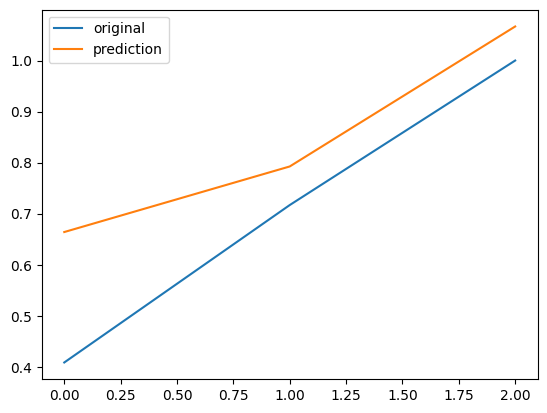

In [ ]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(0)

seq_length = 2
data_dim = 5 # 시가, 최고가, 최저가, 거래량, 종량
hidden_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500


xy = np.loadtxt("/content/drive/MyDrive/boostcourse_딥러닝/google.dataset.csv", delimiter = ",")
xy = xy[::-1]
# print(xy)

# 데이터 나누기
train_size = int(len(xy) * 0.7)
# 한번 ordering해주는 작업을 거친 후에 70%만 남기고, 70%는 학습 set에서 사용
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# print("train_set :", train_set)
# print("test_set : ", test_set)

# 최대최소 정규화
def minmax_scaler(data):
  numerator = data - np.min(data,0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator + 1e-7) #a = 1e-7  # 0.0000001  b = 3e2   # 300.0 이런 표기법임
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)
# 스케일링을 하는 이유 : 숫자가 크면 계산하는데 부담이니까 0부터 1사이 값으로 바꿔준다

# print("train_set", train_set)
# print("test_set", test_set)

# dataset 구축
def build_dataset(time_series, seq_length): #  build_dataset(train_set, seq_length) 이렇게 들어감
  dataX = []
  dataY = []
  # print("time_series",len(time_series))
  # print("seq_length", seq_length)

  for i in range(0, len(time_series) - seq_length):
    _x = time_series[i : i+seq_length, :]
    _y = time_series[i+seq_length, [-1]]
    print(_x, '->', _y)
    dataX.append(_x)
    dataY.append(_y)
  return np.array(dataX), np.array(dataY)

trainX, trainY = build_dataset(train_set, seq_length) # train_set = 5x7, seq_length = 7
testX, testY = build_dataset(test_set, seq_length)

# 데이터를 pytorch tensor로 변환(3D 형태)
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

if len(trainX_tensor.shape) == 2:
    trainX_tensor = trainX_tensor.unsqueeze(-1)  # 입력 차원을 추가하여 (배치 크기, 시퀀스 길이, 입력 차원)
if len(testX_tensor.shape) == 2:
    testX_tensor = testX_tensor.unsqueeze(-1)

print("train_set shape:", train_set.shape)
print("trainX_tensor.shape : ", trainX_tensor.shape)  # 기대하는 출력: (배치 크기, 시퀀스 길이, 입력 차원)
print("testX_tensor.shape : ", testX_tensor.shape)

# LSTM 모델 정의 (Long - short term memory)
"""
기본 RNN은 장기 의존성 문제를 겪는다.
시간이 멀리 떨어진 시점에서의 정보를 잃어버리기 쉬운데 이는 기울기 소실 문제로 인해 발생한다.

LSTM의 구성 요소 3가지 : 셀 상태(cell state), 입력 게이트(input gate), 출력 게이트(output gate)

LSTM의 동작 과정
1. 입력 및 이전 상태 수신 : 현재 입력 x_t와 이전 은닉 상태 h_t-1을 수신
2. 입력 게이트 게산 : 입력 게이트에서 현재 입력과 이전 상태를 통해 새로운 정보의 비율을 결정
3. 셀 상태 업데이트 : 이전 셀 상태에서 필터링된 정보를 반영하여 새로운 셀 상태를 계산
4. 출력 게이트 계산 : 새로운 셀 상태에서 최종 출력을 계산
5. 은닉 상태 업데이트 : 최종 출력을 통해 은닉 상태를 업데이트 합니다.
"""
class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers = layers, batch_first = True)
    # num_layers : LSTM의 층 수, 여러 층으로 쌓을 수 있어 복잡한 패턴을 학습할 수 있음
    # batch_first = True : 입력 데이터의 배치 차원이 첫 번째에 온다는 것을 의미
    self.fc = torch.nn.Linear(hidden_dim, output_dim, bias = True)
    print(self.fc)

  def forward(self, x): # 순전파 메서드
    x, _status = self.rnn(x) # 입력 x를 LSTM 레이어에 통과시킴
    x = self.fc(x[:,-1,:]) # LSTM이 출력 중 마지막 시점의 값을 선택
    return x
  """
  forward는 호출되지는 않는데 어떻게 쓰는거야?
  : nn.Module을 상속받은 클래스에서는 내부적으로 모델 객체를 호출함으로써 자동으로 실행됨.
  """

net = Net(data_dim, hidden_dim, output_dim, 1) # 1은 layer

criterion = torch.nn.MSELoss() # loss를 재고
"""
MSE(평균제곱오차)
: 예측 값과 실제 값의 차이(오차)의 제곱한 후, 평균
"""
optimizer = optim.Adam(net.parameters(), lr = learning_rate)
# Adam optimizer를 통해서 최적화 할거다
"""
net.parameters()
: 네트워크의 모든 학습 가능한 파라미터를 반환.
: Adam optimizer에 의해 학습 중 업데이트된다.
"""

## Training & Evaluation
for i in range(iterations):
  optimizer.zero_grad()
  outputs = net(trainX_tensor)
  loss = criterion(outputs, trainY_tensor)
  loss.backward()
  optimizer.step()
  print(i,loss.item())

plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()


# 5. Seq2Seq

- 내용은 옵시디언에

In [ ]:
# Apply Seq2Seq : Encoder-Decoder
# 간략하게 Encoder - Decoder가 어떻게 되는지만 보자면
import random
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# 전체 코드가 실행되는 부분
# 번역 task를 수행하는 seq2seq model을 구현한 코드

SOURCE_MAX_LENGTH = 10 # 영어문장
TARGET_MAX_LENGTH = 12 # 영어문장을 번역한 한국어 문장
load_pairs, load_source_vocab, load_target_vocab = preprocess(raw, SOURCE_MAX_LENGTH,TARGET_MAX_LENGTH)
# raw : 원문
# preprocess 과정 - 0.7은 내가 가정한 거임
# : source 데이터와 target 데이터 test 데이터(s : 70%, t : 70%)와  target 데이터(s : 30%, t : 30%)으로 나누는 과정
# : 이때, source와 target 문장의 최대 길이도 제한해준다.
print(random.choice(load_pairs))

#encoder의 hidden state 사이즈와 decoder의 hidden state 사이즈를 정의해준다.
enc_hidden_size = 16
dec_hidden_size = enc_hidden_size

# Encoder, Decoder라는 RNN layer를 정의해준다.
# 강사 : 이 encoder, decoder의 한계가 있는데, 이 한계를 극복하기 위해서 더 복잡한 구조를 넣거나 수정하는건 여러분 몫
enc = Encoder(load_source_vocab.n_vocab, enc_hidden_size).to(device)
# Encoder에서는 Encoder의 아웃풋을 decoder로 넘겨주는 코드가 있겠구나~하고 추측할 수 있음
dec = Decoder(dec_hidden_size, load_target_vocab.n_vocab).to(device)

train(load_pairs, load_source_vocab, load_target_vocab, enc, dec, 5000, print_every = 1000)
evaluate(load_pairs, load_source_vocab, load_target_vocab, enc, dec, TARGET_MAX_LENGTH )

reading corpus...
Read 4 sentence pairs


NameError: name 'filter_pair' is not defined

In [ ]:
# 위 코드를 이제 짜보자!
import random
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# pytorch에서 모델이 실행될 장치를 설정하는 코드
# torch.device() : pytorch에서 device는 텐서와 모델이 연산될 장치를 나타냄
# torch.cuda.is_available() : 사용 가능한 GPU가 있는지 확인하는 함수, 있다면 True 아니면 False


raw = ["I feel hungry.  나는 배가 고프다",
       "Pytorch is very easy. 파이토치는 매우 쉽다.",
       "Pytorch is a framwork for deep learning.  파이토치는 딥러닝을 위한 프레임워크이다.",
       "Pytorch is very clear to use. 파이토치는 사용하기 매우 직관적이다."
       ]

SOS_token = 0 # Start of sentence
EOS_token = 1 # End of sentence : 문장이 끝나면 EOS라는 token을 붙여가지고 이 문장의 종료를 알려준다.
# decoder가 hidden state로 encoder의 마지막 출력물을 받아오고
# 첫번째 step의 input을 받아야됨.
# 그 step의 input으로 SOS_token을 넣어주게 된다.
# 그걸 뜻하는 token의 index를 0번으로 준다.


In [ ]:
#preprocessing
def preprocess(corpus, source_max_length, target_max_length):
  print("reading corpus...")
  pairs = []
  for line in corpus:
    pairs.append([s for s in line.strip().lower().split("\t")])
  print("Read {} sentence pairs".format(len(pairs)))

  pairs = [pair for pair in pairs if filter_pair(pair, source_max_length, target_max_length)]
  print("Trimmed to {} sentence pairs".format(len(pairs)))

  source_vocab = Vocab()
  target_vocab = Vocab()

  print("Counting words...")
  for pair in pairs:
    source_vocab.add_vocab(pair[0])
    target_vocab.add_vocab(pair[1])

  print("source vocab size = ", source_vocab.n_vocab)
  print("taget vocab size = ", taget_vocab.n_vocab)

  return pairs, source_vocab, target_vocab

In [ ]:
class Encoder(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Encoder, self).__init__()
    self.hidden_size = hidden_size
    self.embedding = nn.Embedding(input_size, hidden_size)
    # input_size : 사용되고 있는 단어의 갯수,
    # source text에 있는 각각의 단어들은 100개의 차원을 가지는 one-hot encodding으로 표현이 가능
    self.gru = nn.GRU(hidden_size, hidden_size)

  def forward(self, x, hidden):
    x = self.embedding(x).view(1, 1, -1)
    # Embedding : one-hot encodding으로 표현된 것들이 input으로 들어가고, hidden_size만큼의 vetor로 줄이는 matrix
    x, hidden = self.gru(x, hidden) # 줄어든 x가 gru에 들어가서 hidden과 계산
    return x, hidden

In [ ]:
class Decoder(nn.Module):
  def __init__(self, hidden_size, output_size):
    super(Decoder, self).__init()
    self.hidden_size = hidden_size
    self.embedding = nn.Embedding(output_size, hidden_size)
    self.gru = nn.GRU(hidden_size, hidden_size)
    self.out = nn.Linear(hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self, x, hidden):
    x = self.embedding(x).view(1, 1, -1) # embedding 통과
    x, hidden = self.gru(x, hidden) # gru 통과
    x = self.softmax(self.out(x[0])) # out 통과해서 softmax 통과해서 나오게 된다.
    return x, hidden

In [ ]:
# Training
def tensorize(vocab, sentence): # sentence를 one-hot vector로 만들어주는 역할
  indexes = [vocab.vocab2index[word] for word in sentence.split("  ")]
  indexes.append(vocab.vocab2index["<EOS>"])
  return torch.Tensor(indexes).long().to(device).view(-1,1)

def train(pairs, source_vocab, target_vocab, encoder, decoder, n_iter, print_every = 1000, learning_rate = 0.01):
  loss_total = 0

  encoder_optimizer = optim.SGD(encoder.paramaters(), lr = learning_rate)
  decoder_optimizer = optim.SGD(decoder.paramaters(), lr = learning_rate)

  training_batch = [random.choice(pairs) for _ in range(n_iter)]
  # 전체 dataset에서 필요한 개수만큼 random하게 학습 datat를 추출
  training_source = [tensorize(sorce_vocab, pair[0]) for pair in training_batch]
  training_target = [tensorize(target_vocab, pair[1]) for pair in training_batch]

  criterion = nn.MLLLoss() # loss를 재는 방법

  for i in range(1, n_iter + 1):
    source_tensor = training_source[i - 1]
    target_tensor = training_target[i - 1]

    encoder_hidden = torch.zeros([1,1,encoder.hidden_size]).to(device)
    # 맨 처음 encoder의 hidden state에 들어가는 값이 없으니까. 0 vector로 다 만들어가지고 넣어준다.

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    souce_length = source_tensor.size(0)
    target_length = target_tensor.size(0)

    loss = 0

    for enc_input in range(source_length):
      # 문장이 끝날때까지 loop를 돌면서 encoder에서 hidden state를 꺼내온다.
      _, encoder_hidden = encoder(source_tensor[enc_input], encoder_hidden)

      decoder_input  = torch.Tensor([[SOS_token]]).long().to(device)
      decoder_hidden = encoder_hidden

      for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        loss += criterion(decoder_output, target_tensor[di])
        decoder_input = target_tensor[di] # teacher forcing
        # teacher forcing 이란?
        # 보통 시퀀스 에측 모델을 이전 단계의 출력을 다음 단계의 입력으로 사용된다,
        # 하지만 학습 중에는 이 방식이 정확하지 않을 수 있음. 모델이 아직 충분히 학습되지 않았기 때문에
        # 초기에 잘못된 예측을 할 가능성이 높음. -> 그래서 teacher forcing를 사용
        # : 학습 중에 이전 단계의 예측값을 다음 입력으로 사용하는 대신, '실제 정답'을 다음 입력으로 사용

      loss.backward()

      encoder_optimizer.step()
      decoder_optimizer.step()

      loss_iter = loss.item() / target_length
      loss_total += loss_iter

      if i % print_every == 0:
        loss_avg = loss_total / print_every
        loss_total = 0
        print("[{} - {}%] loss = {:05.4f}".format(i, i / n_iter * 100, loss_avg))

-----
위 코드 정리


In [ ]:
# 번역 task를 수행하는 seq2seq model을 구현한 코드
import random
import torch
import torch.nn as nn
import torch.optim as optim


torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# pytorch에서 모델이 실행될 장치를 설정하는 코드
# torch.device() : pytorch에서 device는 텐서와 모델이 연산될 장치를 나타냄
# torch.cuda.is_available() : 사용 가능한 GPU가 있는지 확인하는 함수, 있다면 True 아니면 False

# 1. preprocessing
# preprocess(raw, SOURCE_MAX_LENGTH,TARGET_MAX_LENGTH)으로 호출함. raw는 원문
def preprocess(corpus, source_max_length, target_max_length):
  print("reading corpus...")
  pairs = []
  for line in corpus:
    pairs.append([s for s in line.strip().lower().split("\t")])
    print("paris : ", pairs)
    # paris :  [['i feel hungry.  나는 배가 고프다'], ['pytorch is very easy. 파이토치는 매우 쉽다.'], ['pytorch is a framwork for deep learning.  파이토치는 딥러닝을 위한 프레임워크이다.'], ['pytorch is very clear to use. 파이토치는 사용하기 매우 직관적이다.']]
  print("Read {} sentence pairs".format(len(pairs)))

  pairs = [pair for pair in pairs if filter_pair(pair, source_max_length, target_max_length)]
  print("Trimmed to {} sentence pairs".format(len(pairs)))

  source_vocab = Vocab()
  target_vocab = Vocab()

  print("Counting words...")
  for pair in pairs:
    source_vocab.add_vocab(pair[0])
    target_vocab.add_vocab(pair[1])

  print("source vocab size = ", source_vocab.n_vocab)
  print("taget vocab size = ", taget_vocab.n_vocab)

  return pairs, source_vocab, target_vocab




class Encoder(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Encoder, self).__init__()
    self.hidden_size = hidden_size
    self.embedding = nn.Embedding(input_size, hidden_size)
    # input_size : 사용되고 있는 단어의 갯수,
    # source text에 있는 각각의 단어들은 100개의 차원을 가지는 one-hot encodding으로 표현이 가능
    self.gru = nn.GRU(hidden_size, hidden_size)

  def forward(self, x, hidden):
    x = self.embedding(x).view(1, 1, -1)
    # Embedding : one-hot encodding으로 표현된 것들이 input으로 들어가고, hidden_size만큼의 vetor로 줄이는 matrix
    x, hidden = self.gru(x, hidden) # 줄어든 x가 gru에 들어가서 hidden과 계산
    return x, hidden


class Decoder(nn.Module):
  def __init__(self, hidden_size, output_size):
    super(Decoder, self).__init()
    self.hidden_size = hidden_size
    self.embedding = nn.Embedding(output_size, hidden_size)
    self.gru = nn.GRU(hidden_size, hidden_size)
    self.out = nn.Linear(hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim = 1)

  def forward(self, x, hidden):
    x = self.embedding(x).view(1, 1, -1) # embedding 통과
    x, hidden = self.gru(x, hidden) # gru 통과
    x = self.softmax(self.out(x[0])) # out 통과해서 softmax 통과해서 나오게 된다.
    return x, hidden

# Training
def tensorize(vocab, sentence): # sentence를 one-hot vector로 만들어주는 역할
  indexes = [vocab.vocab2index[word] for word in sentence.split("  ")]
  indexes.append(vocab.vocab2index["<EOS>"])
  return torch.Tensor(indexes).long().to(device).view(-1,1)

def train(pairs, source_vocab, target_vocab, encoder, decoder, n_iter, print_every = 1000, learning_rate = 0.01):
  loss_total = 0

  encoder_optimizer = optim.SGD(encoder.paramaters(), lr = learning_rate)
  decoder_optimizer = optim.SGD(decoder.paramaters(), lr = learning_rate)

  training_batch = [random.choice(pairs) for _ in range(n_iter)]
  # 전체 dataset에서 필요한 개수만큼 random하게 학습 datat를 추출
  training_source = [tensorize(sorce_vocab, pair[0]) for pair in training_batch]
  training_target = [tensorize(target_vocab, pair[1]) for pair in training_batch]

  criterion = nn.NLLLoss() # loss를 재는 방법

  for i in range(1, n_iter + 1):
    source_tensor = training_source[i - 1]
    target_tensor = training_target[i - 1]

    encoder_hidden = torch.zeros([1,1,encoder.hidden_size]).to(device)
    # 맨 처음 encoder의 hidden state에 들어가는 값이 없으니까. 0 vector로 다 만들어가지고 넣어준다.

    encoder_optimizer.zero_grad()
    decoder_optimizer.zero_grad()

    souce_length = source_tensor.size(0)
    target_length = target_tensor.size(0)

    loss = 0

    for enc_input in range(source_length):
      # 문장이 끝날때까지 loop를 돌면서 encoder에서 hidden state를 꺼내온다.
      _, encoder_hidden = encoder(source_tensor[enc_input], encoder_hidden)

      decoder_input  = torch.Tensor([[SOS_token]]).long().to(device)
      decoder_hidden = encoder_hidden

      for di in range(target_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        loss += criterion(decoder_output, target_tensor[di])
        decoder_input = target_tensor[di] # teacher forcing
        # teacher forcing 이란?
        # 보통 시퀀스 에측 모델을 이전 단계의 출력을 다음 단계의 입력으로 사용된다,
        # 하지만 학습 중에는 이 방식이 정확하지 않을 수 있음. 모델이 아직 충분히 학습되지 않았기 때문에
        # 초기에 잘못된 예측을 할 가능성이 높음. -> 그래서 teacher forcing를 사용
        # : 학습 중에 이전 단계의 예측값을 다음 입력으로 사용하는 대신, '실제 정답'을 다음 입력으로 사용

      loss.backward()

      encoder_optimizer.step()
      decoder_optimizer.step()

      loss_iter = loss.item() / target_length
      loss_total += loss_iter

      if i % print_every == 0:
        loss_avg = loss_total / print_every
        loss_total = 0
        print("[{} - {}%] loss = {:05.4f}".format(i, i / n_iter * 100, loss_avg))


raw = ["I feel hungry.  나는 배가 고프다",
       "Pytorch is very easy. 파이토치는 매우 쉽다.",
       "Pytorch is a framwork for deep learning.  파이토치는 딥러닝을 위한 프레임워크이다.",
       "Pytorch is very clear to use. 파이토치는 사용하기 매우 직관적이다."
       ]

SOS_token = 0 # Start of sentence
EOS_token = 1 # End of sentence : 문장이 끝나면 EOS라는 token을 붙여가지고 이 문장의 종료를 알려준다.
# decoder가 hidden state로 encoder의 마지막 출력물을 받아오고
# 첫번째 step의 input을 받아야됨.
# 그 step의 input으로 SOS_token을 넣어주게 된다.
# 그걸 뜻하는 token의 index를 0번으로 준다.

# 전체 코드가 실행되는 부분

SOURCE_MAX_LENGTH = 10 # 영어 문장의 최대 길이를 10 단어로 제한한다.
TARGET_MAX_LENGTH = 12 # 한국어 번역 문장의 최대 길이를 12 단어로 제한한다.
load_pairs, load_source_vocab, load_target_vocab = preprocess(raw, SOURCE_MAX_LENGTH,TARGET_MAX_LENGTH)
# raw : 원문
# preprocess 과정 - 0.7은 내가 가정한 거임
# : source 데이터와 target 데이터 test 데이터(s : 70%, t : 70%)와  target 데이터(s : 30%, t : 30%)으로 나누는 과정
# : 이때, source와 target 문장의 최대 길이도 제한해준다.
print(random.choice(load_pairs))

#encoder의 hidden state 사이즈와 decoder의 hidden state 사이즈를 정의해준다.
enc_hidden_size = 16
dec_hidden_size = enc_hidden_size

# Encoder, Decoder라는 RNN layer를 정의해준다.
# 강사 : 이 encoder, decoder의 한계가 있는데, 이 한계를 극복하기 위해서 더 복잡한 구조를 넣거나 수정하는건 여러분 몫
enc = Encoder(load_source_vocab.n_vocab, enc_hidden_size).to(device)
# Encoder에서는 Encoder의 아웃풋을 decoder로 넘겨주는 코드가 있겠구나~하고 추측할 수 있음
dec = Decoder(dec_hidden_size, load_target_vocab.n_vocab).to(device)

train(load_pairs, load_source_vocab, load_target_vocab, enc, dec, 5000, print_every = 1000)
evaluate(load_pairs, load_source_vocab, load_target_vocab, enc, dec, TARGET_MAX_LENGTH )

reading corpus...
paris :  [['i feel hungry.  나는 배가 고프다']]
paris :  [['i feel hungry.  나는 배가 고프다'], ['pytorch is very easy. 파이토치는 매우 쉽다.']]
paris :  [['i feel hungry.  나는 배가 고프다'], ['pytorch is very easy. 파이토치는 매우 쉽다.'], ['pytorch is a framwork for deep learning.  파이토치는 딥러닝을 위한 프레임워크이다.']]
paris :  [['i feel hungry.  나는 배가 고프다'], ['pytorch is very easy. 파이토치는 매우 쉽다.'], ['pytorch is a framwork for deep learning.  파이토치는 딥러닝을 위한 프레임워크이다.'], ['pytorch is very clear to use. 파이토치는 사용하기 매우 직관적이다.']]
Read 4 sentence pairs


NameError: name 'filter_pair' is not defined

In [35]:
import random
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Vocab 클래스 정의
class Vocab:
    def __init__(self):
        self.vocab2index = {"<SOS>": 0, "<EOS>": 1}  # SOS와 EOS 토큰 추가
        self.index2vocab = {0: "<SOS>", 1: "<EOS>"}
        self.n_vocab = 2  # SOS와 EOS로 시작

    def add_vocab(self, sentence):
        for word in sentence.split():
            if word not in self.vocab2index:
                self.vocab2index[word] = self.n_vocab
                self.index2vocab[self.n_vocab] = word
                self.n_vocab += 1

def preprocess(corpus, source_max_length, target_max_length):
    print("Reading corpus...")
    pairs = []
    for line in corpus:
        pairs.append([s for s in line.strip().lower().split("  ")])
    print(f"Read {len(pairs)} sentence pairs")

    source_vocab = Vocab()
    target_vocab = Vocab()

    print("Counting words...")
    for pair in pairs:
        source_vocab.add_vocab(pair[0])
        target_vocab.add_vocab(pair[1])

    print(f"Source vocab size = {source_vocab.n_vocab}")
    print(f"Target vocab size = {target_vocab.n_vocab}")

    return pairs, source_vocab, target_vocab

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)

    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1)
        x, hidden = self.gru(x, hidden)
        return x, hidden

class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(output_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size)
        self.out = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1)
        x, hidden = self.gru(x, hidden)
        x = self.softmax(self.out(x[0]))
        return x, hidden

def tensorize(vocab, sentence):
    indexes = [vocab.vocab2index[word] for word in sentence.split()]
    indexes.append(vocab.vocab2index["<EOS>"])
    return torch.Tensor(indexes).long().to(device).view(-1, 1)

def train(pairs, source_vocab, target_vocab, encoder, decoder, n_iter, print_every=1000, learning_rate=0.01):
    loss_total = 0

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)

    training_batch = [random.choice(pairs) for _ in range(n_iter)]
    training_source = [tensorize(source_vocab, pair[0]) for pair in training_batch]
    training_target = [tensorize(target_vocab, pair[1]) for pair in training_batch]

    criterion = nn.NLLLoss()

    for i in range(1, n_iter + 1):
        source_tensor = training_source[i - 1]
        target_tensor = training_target[i - 1]

        encoder_hidden = torch.zeros([1, 1, encoder.hidden_size]).to(device)

        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        source_length = source_tensor.size(0)
        target_length = target_tensor.size(0)

        loss = 0

        for enc_input in range(source_length):
            _, encoder_hidden = encoder(source_tensor[enc_input], encoder_hidden)

        decoder_input = torch.Tensor([[SOS_token]]).long().to(device)
        decoder_hidden = encoder_hidden

        for di in range(target_length):
            decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
            loss += criterion(decoder_output, target_tensor[di])
            decoder_input = target_tensor[di]  # Teacher forcing

        loss.backward()
        encoder_optimizer.step()
        decoder_optimizer.step()

        loss_iter = loss.item() / target_length
        loss_total += loss_iter

        if i % print_every == 0:
            loss_avg = loss_total / print_every
            loss_total = 0
            print(f"[{i} - {i / n_iter * 100:.2f}%] loss = {loss_avg:.4f}")

def evaluate(pairs, source_vocab, target_vocab, encoder, decoder, max_length):
    pair = random.choice(pairs)
    source_sentence = pair[0]
    target_sentence = pair[1]

    print(f"Source: {source_sentence}")
    print(f"Target: {target_sentence}")

    source_tensor = tensorize(source_vocab, source_sentence)
    encoder_hidden = torch.zeros([1, 1, encoder.hidden_size]).to(device)

    source_length = source_tensor.size(0)

    for enc_input in range(source_length):
        _, encoder_hidden = encoder(source_tensor[enc_input], encoder_hidden)

    decoder_input = torch.Tensor([[SOS_token]]).long().to(device)
    decoder_hidden = encoder_hidden

    decoded_words = []

    for di in range(max_length):
        decoder_output, decoder_hidden = decoder(decoder_input, decoder_hidden)
        topv, topi = decoder_output.topk(1)
        if topi.item() == EOS_token:
            break
        else:
            decoded_words.append(target_vocab.index2vocab[topi.item()])

        decoder_input = topi.squeeze().detach()

    print("Predicted:", " ".join(decoded_words))

# Example corpus
raw = [
    "I feel hungry.  나는 배가 고프다",
    "Pytorch is very easy.  파이토치는 매우 쉽다.",
    "Pytorch is a framework for deep learning.  파이토치는 딥러닝을 위한 프레임워크이다.",
    "Pytorch is very clear to use.  파이토치는 사용하기 매우 직관적이다."
]

SOS_token = 0
EOS_token = 1

# Preprocess data
SOURCE_MAX_LENGTH = 10
TARGET_MAX_LENGTH = 12
load_pairs, load_source_vocab, load_target_vocab = preprocess(raw, SOURCE_MAX_LENGTH, TARGET_MAX_LENGTH)

# Define encoder and decoder
enc_hidden_size = 16
dec_hidden_size = enc_hidden_size
enc = Encoder(load_source_vocab.n_vocab, enc_hidden_size).to(device)
dec = Decoder(dec_hidden_size, load_target_vocab.n_vocab).to(device)

# Train model
train(load_pairs, load_source_vocab, load_target_vocab, enc, dec, 5000, print_every=1000)

# Evaluate model
evaluate(load_pairs, load_source_vocab, load_target_vocab, enc, dec, TARGET_MAX_LENGTH)


Reading corpus...
Read 4 sentence pairs
Counting words...
Source vocab size = 17
Target vocab size = 13
[1000 - 20.00%] loss = 0.7389
[2000 - 40.00%] loss = 0.1096
[3000 - 60.00%] loss = 0.0345
[4000 - 80.00%] loss = 0.0182
[5000 - 100.00%] loss = 0.0124
Source: i feel hungry.
Target: 나는 배가 고프다
Predicted: 나는 배가 고프다


In [2]:
class Dog:
	def __init__(self, name):
		self.name = name
		self.tricks = []

	def add_trick(self, trick):
		self.tricks.append(trick)

d = Dog('Fido')
e = Dog('Buddy')
d.add_trick('roll over')
e.add_trick('play dead')
d.tricks

['roll over']